In [44]:
#importing libraries
import numpy as np 
import pandas as pd 
import tenseal as ts 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report

In [63]:
#load dataset
breast_cancer_data = load_breast_cancer()
breast_cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [67]:
#splitting data into target and input variables
breast_cancer_df = pd.DataFrame(np.c_[breast_cancer_data['data'], 
                                      breast_cancer_data['target']],
                                      columns=np.append(breast_cancer_data['feature_names'],
                                                        ['target']))
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [ ]:
#basic descriptives
breast_cancer_df.head(6)

In [ ]:
#information about dataframe
breast_cancer_df.info()

In [ ]:
#Numerical distribution of data
breast_cancer_df.describe()

In [1]:
#Data Visualization
# pair plots
sns.pairplot(breast_cancer_df, hue='target')

NameError: name 'sns' is not defined

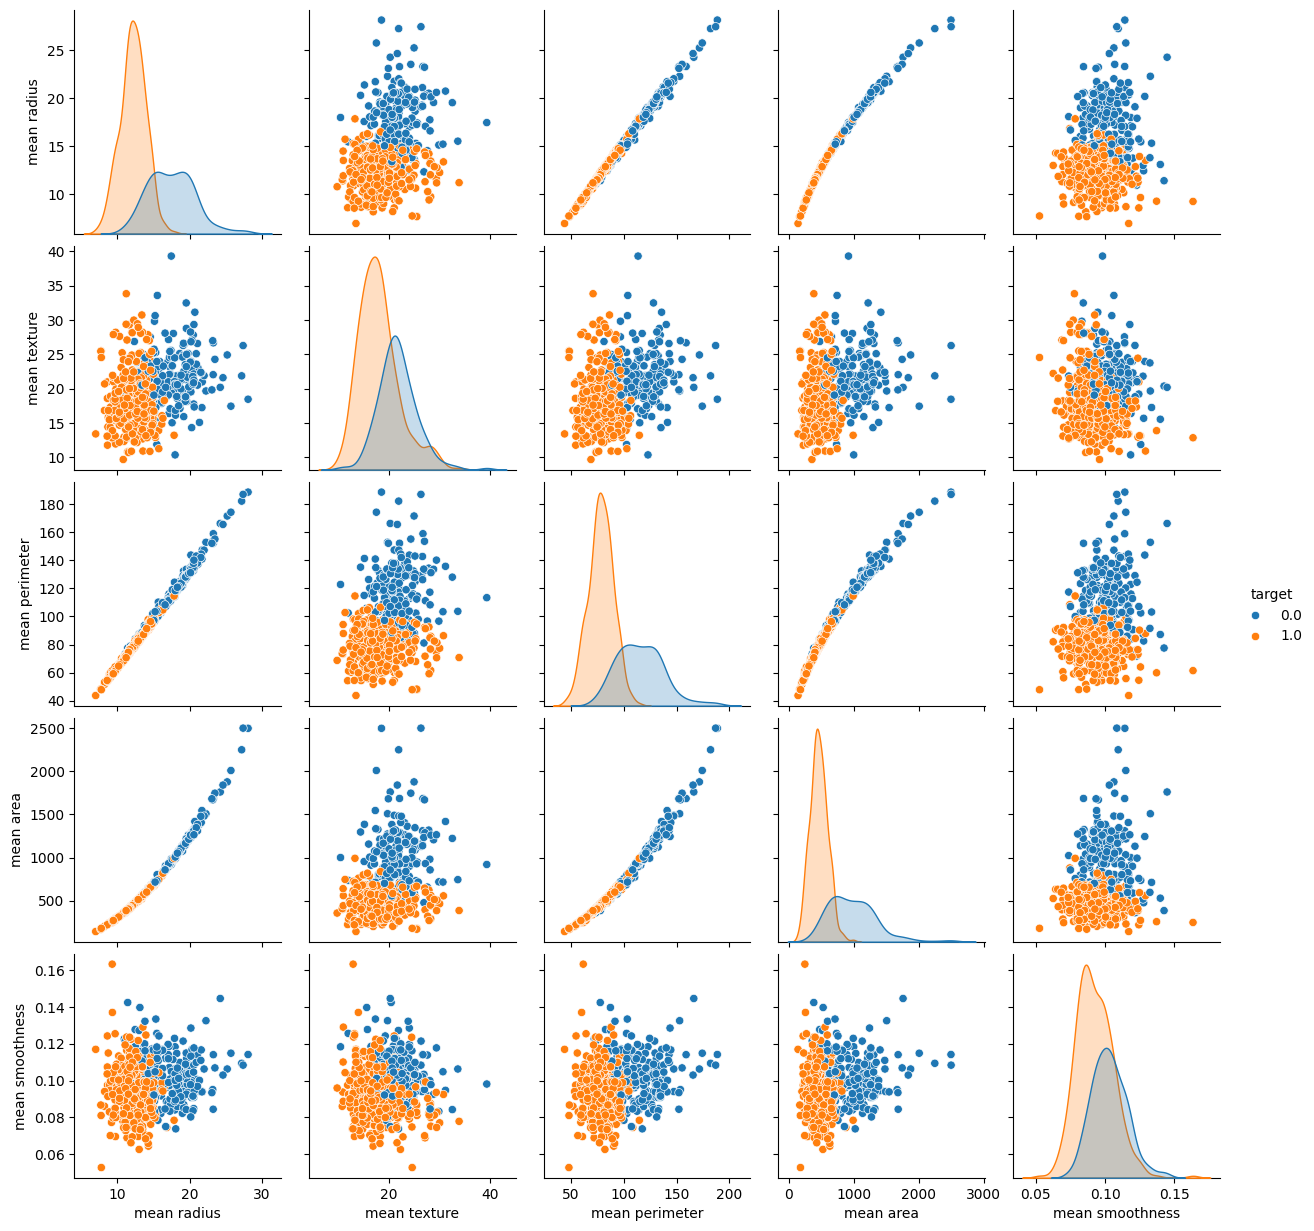

In [72]:
#pair plots using a subset of the features
sns.pairplot(breast_cancer_df, hue='target', 
             vars=['mean radius', 'mean texture', 'mean perimeter', 
                   'mean area', 'mean smoothness'])

<Axes: xlabel='target', ylabel='count'>

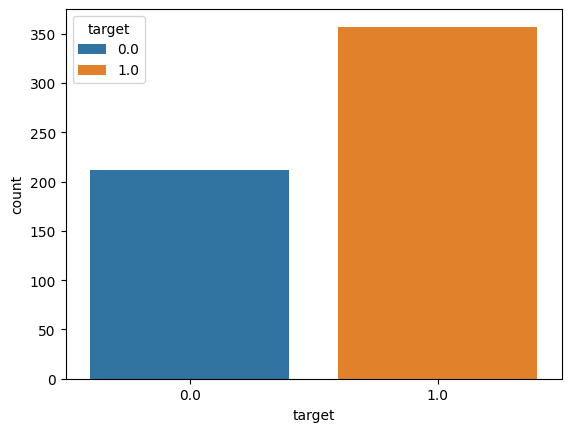

In [80]:
#count the target class
sns.countplot(x='target',data=breast_cancer_df, hue='target')

In [ ]:
#count the feature mean class
plt.figure(figsize=(20, 8))
sns.countplot(x='mean radius',data=breast_cancer_df)

<Axes: >

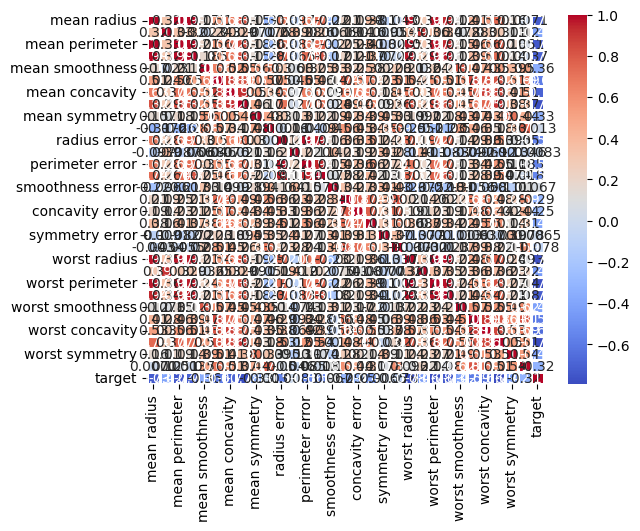

In [ ]:
#Heatmap of correlation
plt.Figure(figsize=(30,30))
sns.heatmap(breast_cancer_df.corr(), annot=True, cmap='coolwarm',
            linewidths=2)

In [91]:
#correlation barplot
breast_cancer_df_sub = breast_cancer_df.drop(['target'], axis=1)

plt.Figure(figsize=(16,5))
ax = sns.barplot(breast_cancer_df_sub.corrwith(breast_cancer_df.target).index,
                 breast_cancer_df_sub.corrwith(breast_cancer_df.target))

ax.tick_params(labelrotation = 90)

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [4]:
#Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Training Decision Tree Classifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(X_train, y_train)

Model trained with Decision Tree.


In [50]:
#making predictions with the model
y_pred = model.predict(X_test)

#model accuracy, how often is the classifier right?
print('Accuracy:', round(accuracy_score(y_test, y_pred)*100, 3) , '%')

#model precision, how accurate were we in predicting the positives?
print('Precision:', round(precision_score(y_test, y_pred)*100, 3) , '%')

#model recall score, how accurate were we in predicting the true positives?
print('Recall Score:', round(recall_score(y_test, y_pred)*100, 3) , '%')

#model f1 score, 
print('f1 Score:', round(f1_score(y_test, y_pred), 3))

#model classification report
print('Classification Report: \n', classification_report(y_test,y_pred))


Accuracy: 96.491 %
Precision: 94.667 %
Recall Score: 100.0 %
f1 Score: 0.973
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



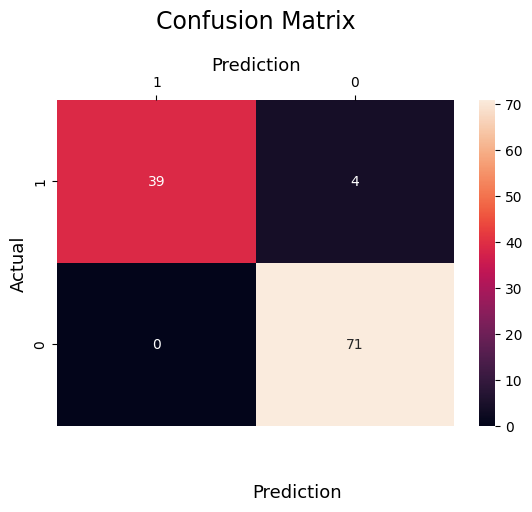

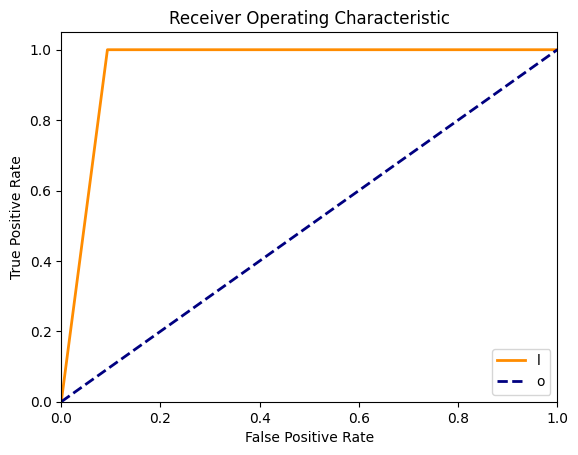

In [ ]:
#confusion matrix and roc_curve, roc_auc
print()
print()

#model confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, 
            annot=True, 
            fmt='g',
            xticklabels=['1','0'],
            yticklabels=['1','0'])

plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

print()
print()

#Model Area Under the Curve
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(false_pos_rate, true_pos_rate, color='darkorange', lw=2, 
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend('loc ="Lower Right')
plt.show()

In [ ]:
#showing graphical representation of the classifier
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image, display
import pydotplus


dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=)

In [13]:
#Create a Tenseal context
context = ts.context(
    scheme = ts.SCHEME_TYPE.CKKS,
    poly_modulus_degree = 8192,
    coeff_mod_bit_sizes = [60, 40, 40, 60]
)

#Enable encryption features
context.global_scale = 2**40
context.generate_galois_keys()
context.generate_relin_keys()

In [55]:
#Encrypting training data
X_train_encrypt = [ts.ckks_vector(context, x) for x in X_train]
y_train_encrypt = [ts.ckks_vector(context, [y]) for y in y_train]

print(f"First encrypted sample: {X_train_encrypt[0]}")

First encrypted sample: <tenseal.tensors.ckksvector.CKKSVector object at 0x000001FC1B17C770>


In [56]:
#defining an encrypted decision function 

def encrypted_decision_function(enc_sample, split_value, context):
    """some test"""
    decrypted_sample = enc_sample.decrypt()
    return 1 if decrypted_sample[0] >= split_value else 0

split_value = model.tree_.threshold[0]

print(split_value)


0.05127999931573868
